# Tutorial 2: Simulating Interpolated Designs

In this tutorial we will learn how to simulate designs obtained from the SQuADDS Database. We will be using **Ansys HFSS** as the simulator backend in this tutorial.

**Warning: This tutorial will not run on Mac OS since Ansys HFSS is not available on Mac**

In [1]:
%load_ext autoreload
%autoreload 2

## Get Target Interpolated Design
Find the best geometries for your desired Hamiltonian parameters the same way as in [Tutorial 1](https://lfl-lab.github.io/SQuADDS/source/tutorials/Tutorial-1_Getting_Started_with_SQuADDS.html#Making-Systems-out-of-Circuit-QED-Elements):

In [2]:
from squadds import SQuADDS_DB

db = SQuADDS_DB()
db.select_system("qubit")
db.select_qubit("TransmonCross")
df = db.create_system_df()
# df

In [3]:
from squadds import Analyzer
analyzer = Analyzer(db)

target_params={"qubit_frequency_GHz": 4, "anharmonicity_MHz": -200}

results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Euclidean",
                                       display=True)
results

 d:\Anaconda\envs\metal_test_env\lib\site-packages\squadds\core\analysis.py: 274


,design_options,design_tool,claw_to_claw,claw_to_ground,cross_to_claw,cross_to_cross,cross_to_ground,ground_to_ground,units,renderer_options,...,PI,date_created,group,institution,uploader,EC,EJ,EJEC,qubit_frequency_GHz,anharmonicity_MHz
643,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,106.91739,101.13161,5.25204,102.49025,102.49025,255.94708,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,"Eli Levenson-Falk, PhD",2023-09-20-142547,LFL,USC,Andre Kuo,0.179783,12.278081,68.293903,4.013772,-201.551532
1862,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,80.01554,76.72741,2.89095,104.64079,104.64079,233.88902,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,"Eli Levenson-Falk, PhD",2023-09-20-142547,LFL,USC,Andre Kuo,0.180135,12.278081,68.160443,4.017505,-201.973598
1714,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,76.27207,73.26136,2.62986,104.89818,104.89818,230.69451,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,"Eli Levenson-Falk, PhD",2023-09-20-142547,LFL,USC,Andre Kuo,0.180141,12.278081,68.158098,4.017570,-201.981031


In [4]:
best_device = results.iloc[0]
best_device

design_options         {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...
design_tool                                                 qiskit-metal
claw_to_claw                                                   106.91739
claw_to_ground                                                 101.13161
cross_to_claw                                                    5.25204
cross_to_cross                                                 102.49025
cross_to_ground                                                102.49025
ground_to_ground                                               255.94708
units                                                                 fF
renderer_options       {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...
setup                  {'auto_increase_solution_order': True, 'enable...
simulator                                                     Ansys HFSS
PI                                                Eli Levenson-Falk, PhD
date_created                                       

## Simulate the Target Design

Once you have the target design (in this case in Qiskit Metal format), you can then simulate it in whichever application you choose. However, we provide a native API to make it easier to get started with simulation on Ansys HFSS (support for AWS Palace will be provided hopefully in the near future!).   

We use the `AnsysSimulator` class to run simulations:

In [5]:
from squadds import AnsysSimulator

The `AnsysSimulator` object takes the analyzer from before and the target "best device" that you want to simulate as parameters.

In [6]:
ansys_simulator = AnsysSimulator(analyzer, best_device)

selected system: qubit


In [7]:
best_device

design_options         {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...
design_tool                                                 qiskit-metal
claw_to_claw                                                   106.91739
claw_to_ground                                                 101.13161
cross_to_claw                                                    5.25204
cross_to_cross                                                 102.49025
cross_to_ground                                                102.49025
ground_to_ground                                               255.94708
units                                                                 fF
renderer_options       {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...
setup                  {'auto_increase_solution_order': True, 'enable...
simulator                                                     Ansys HFSS
PI                                                Eli Levenson-Falk, PhD
date_created                                       

We can view the geometry and simulation setup from the database entry for our best device as follows:

In [8]:
best_device_geometry = best_device["design_options"]
best_device_geometry

{'aedt_hfss_capacitance': 0,
 'aedt_hfss_inductance': 9.686e-09,
 'aedt_q3d_capacitance': 0,
 'aedt_q3d_inductance': 1e-08,
 'chip': 'main',
 'connection_pads': {'readout': {'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'claw_gap': '5.1um',
   'claw_length': '190um',
   'claw_width': '15um',
   'connector_location': '90',
   'connector_type': '0',
   'ground_spacing': '10um'}},
 'cross_gap': '30um',
 'cross_length': '210um',
 'cross_width': '30um',
 'gds_cell_name': 'my_other_junction',
 'hfss_capacitance': 0,
 'hfss_inductance': 9.686e-09,
 'hfss_mesh_kw_jj': 7e-06,
 'hfss_resistance': 0,
 'layer': '1',
 'orientation': '-90',
 'pos_x': '-1500um',
 'pos_y': '1200um',
 'q3d_capacitance': 0,
 'q3d_inductance': '10nH',
 'q3d_mesh_kw_jj': 7e-06,
 'q3d_resistance': 0}

Now, let's say we want to change some parameter in the design, for example, the `cross_length`, just for demonstration purposes.

In [9]:
best_device_geometry["cross_length"] = '310um'
best_device_geometry

{'aedt_hfss_capacitance': 0,
 'aedt_hfss_inductance': 9.686e-09,
 'aedt_q3d_capacitance': 0,
 'aedt_q3d_inductance': 1e-08,
 'chip': 'main',
 'connection_pads': {'readout': {'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'claw_gap': '5.1um',
   'claw_length': '190um',
   'claw_width': '15um',
   'connector_location': '90',
   'connector_type': '0',
   'ground_spacing': '10um'}},
 'cross_gap': '30um',
 'cross_length': '310um',
 'cross_width': '30um',
 'gds_cell_name': 'my_other_junction',
 'hfss_capacitance': 0,
 'hfss_inductance': 9.686e-09,
 'hfss_mesh_kw_jj': 7e-06,
 'hfss_resistance': 0,
 'layer': '1',
 'orientation': '-90',
 'pos_x': '-1500um',
 'pos_y': '1200um',
 'q3d_capacitance': 0,
 'q3d_inductance': '10nH',
 'q3d_mesh_kw_jj': 7e-06,
 'q3d_resistance': 0}

In [10]:
best_device_sim_setup = best_device["setup"]
best_device_sim_setup

{'auto_increase_solution_order': True,
 'enabled': True,
 'freq_ghz': 5.0,
 'max_passes': 30,
 'min_converged_passes': 1,
 'min_passes': 2,
 'name': 'sweep_setup',
 'percent_error': 0.1,
 'percent_refinement': 30,
 'reuse_selected_design': False,
 'reuse_setup': False,
 'run': {'box_plus_buffer': True,
  'components': array(['Q'], dtype=object),
  'name': 'sweep_v2.0',
  'open_terminations': array([array(['Q', 'readout'], dtype=object)], dtype=object)},
 'save_fields': False,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

Then, we simulate our device with Ansys HFSS. In this case, we are simulating a TransmonCross object to get its corresponding capacitance matrix.

In [11]:
ansys_results = ansys_simulator.simulate(best_device)
ansys_results

the parameters ['run'] are unsupported, so they have been ignored
{'pos_x': '-1500um', 'pos_y': '1200um', 'orientation': '-90', 'chip': 'main', 'layer': '1', 'connection_pads': {'readout': {'connector_type': '0', 'claw_length': '190um', 'ground_spacing': '10um', 'claw_width': '15um', 'claw_gap': '5.1um', 'claw_cpw_length': '40um', 'claw_cpw_width': '10um', 'connector_location': '90'}}, 'cross_width': '30um', 'cross_length': '310um', 'cross_gap': '30um', 'hfss_inductance': 9.686e-09, 'hfss_capacitance': 0, 'hfss_resistance': 0, 'hfss_mesh_kw_jj': 7e-06, 'q3d_inductance': '10nH', 'q3d_capacitance': 0, 'q3d_resistance': 0, 'q3d_mesh_kw_jj': 7e-06, 'gds_cell_name': 'my_other_junction', 'aedt_q3d_inductance': 1e-08, 'aedt_q3d_capacitance': 0, 'aedt_hfss_inductance': 9.686e-09, 'aedt_hfss_capacitance': 0}


INFO 02:45PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:45PM [load_ansys_project]: 	Opened Ansys App
INFO 02:45PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 02:45PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project50
INFO 02:45PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
WARNING 02:45PM [connect_setup]: 	No design setup detected.
WARNING 02:45PM [connect_setup]: 	Creating eigenmode default setup.
INFO 02:45PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 02:45PM [connect]: 	Connected to project "Project50" and design "CavitySweep_hfss" 😀 

INFO 02:45PM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d2 [Solution type: Q3D]
WARNING 02:45PM [connect_setup]: 	No design setup detected.
WARNING 02:45PM [connect_setup]: 	Creating Q3D default setup.
INFO 02:45PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEP

{'design': {'design_options': {'pos_x': '-1500um',
   'pos_y': '1200um',
   'orientation': '-90',
   'chip': 'main',
   'layer': '1',
   'connection_pads': {'readout': {'connector_type': '0',
     'claw_length': '190um',
     'ground_spacing': '10um',
     'claw_width': '15um',
     'claw_gap': '5.1um',
     'claw_cpw_length': '40um',
     'claw_cpw_width': '10um',
     'connector_location': '90'}},
   'cross_width': '30um',
   'cross_length': '310um',
   'cross_gap': '30um',
   'hfss_inductance': 9.686e-09,
   'hfss_capacitance': 0,
   'hfss_resistance': 0,
   'hfss_mesh_kw_jj': 7e-06,
   'q3d_inductance': '10nH',
   'q3d_capacitance': 0,
   'q3d_resistance': 0,
   'q3d_mesh_kw_jj': 7e-06,
   'gds_cell_name': 'my_other_junction',
   'aedt_q3d_inductance': 1e-08,
   'aedt_q3d_capacitance': 0,
   'aedt_hfss_inductance': 9.686e-09,
   'aedt_hfss_capacitance': 0},
  'design_tool': 'Qiskit Metal'},
 'sim_options': {'sim_type': 'lom',
  'setup': {'name': 'sweep_setup',
   'reuse_selected_de

After the simulation is finished, we have the option to take screenshots of our design in the renderer and in Qiskit Metal to verify our geometry visually, as follows:

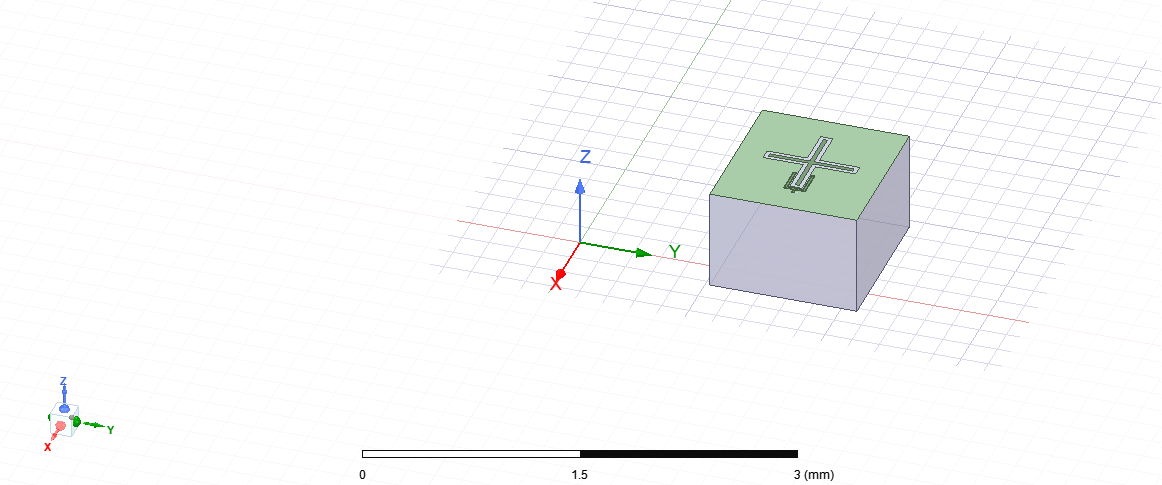

In [12]:
ansys_simulator.get_renderer_screenshot()

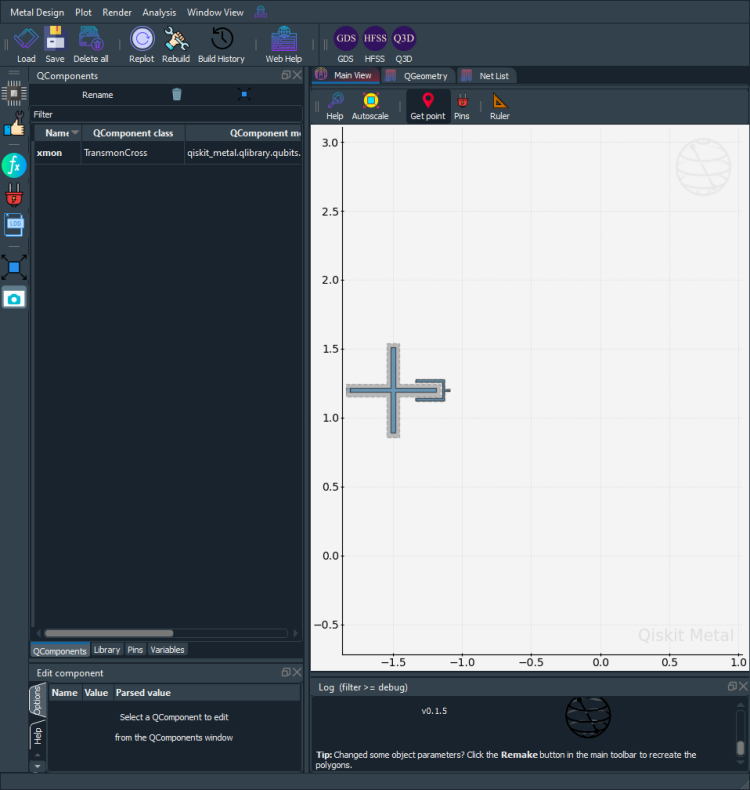

In [13]:
ansys_simulator.get_design_screenshot()

We can also analyze the simulated capacitance matrix results using the `get_xmon_info()` function, which returns the `qubit_anharmonicity_MHz` and  `qubit_frequency_GHz`.

In [14]:
ansys_simulator.get_xmon_info(ansys_results)

qubit anharmonicity = -129 MHz 
qubit frequency = 3.827 GHz


{'qubit_frequency_GHz': 3.8272272294856684,
 'anharmonicity_MHz': -128.9200968243822}

### Extracting the data needed for contributing to the dataset

Suppose that we wanted to contribute this "new" design and simulation results to `SQuADDS_DB`.

We need to first, extract the correct data that will be neccessary for contributing the results.

First, we get the `design` dictionary:

In [15]:
design_dict = ansys_results["design"]
design_dict

{'design_options': {'pos_x': '-1500um',
  'pos_y': '1200um',
  'orientation': '-90',
  'chip': 'main',
  'layer': '1',
  'connection_pads': {'readout': {'connector_type': '0',
    'claw_length': '190um',
    'ground_spacing': '10um',
    'claw_width': '15um',
    'claw_gap': '5.1um',
    'claw_cpw_length': '40um',
    'claw_cpw_width': '10um',
    'connector_location': '90'}},
  'cross_width': '30um',
  'cross_length': '310um',
  'cross_gap': '30um',
  'hfss_inductance': 9.686e-09,
  'hfss_capacitance': 0,
  'hfss_resistance': 0,
  'hfss_mesh_kw_jj': 7e-06,
  'q3d_inductance': '10nH',
  'q3d_capacitance': 0,
  'q3d_resistance': 0,
  'q3d_mesh_kw_jj': 7e-06,
  'gds_cell_name': 'my_other_junction',
  'aedt_q3d_inductance': 1e-08,
  'aedt_q3d_capacitance': 0,
  'aedt_hfss_inductance': 9.686e-09,
  'aedt_hfss_capacitance': 0},
 'design_tool': 'Qiskit Metal'}

Then, we can get the `sim_options` dictionary:

In [16]:
sim_options_dict = ansys_results["sim_options"]
sim_options_dict

{'sim_type': 'lom',
 'setup': {'name': 'sweep_setup',
  'reuse_selected_design': False,
  'reuse_setup': False,
  'freq_ghz': 5.0,
  'save_fields': False,
  'enabled': True,
  'max_passes': 30,
  'min_passes': 2,
  'min_converged_passes': 1,
  'percent_error': 0.1,
  'percent_refinement': 30,
  'auto_increase_solution_order': True,
  'solution_order': 'High',
  'solver_type': 'Iterative',
  'run': {'name': 'LOMv2.0',
   'components': ['xmon'],
   'open_terminations': <zip at 0x24ef4ea7d00>,
   'box_plus_buffer': True}},
 'simulator': 'Ansys HFSS'}

And finally, the `sim_results` dictionary:

In this particular simulation, all of our results have units of femtoFarads, so we can just add a global `units` key with value `fF`.

In [17]:
sim_results_dict = ansys_results["sim_results"]
sim_results_dict.update({"units": "fF"})
sim_results_dict

{'cross_to_ground': -157.6063,
 'claw_to_ground': -101.24431,
 'cross_to_claw': -4.517,
 'cross_to_cross': 164.52267,
 'claw_to_claw': 106.18101,
 'ground_to_ground': 320.80404,
 'units': 'fF'}

We go over this process in more details in [Tutorial 3](https://lfl-lab.github.io/SQuADDS/source/tutorials/Tutorial-3_Contributing_to_SQuADDS.html#via-SQuADDS-API)

## Simulating an Interpolated Qubit + Cavity device

This time, we look for a complete device, which includes a TransmonCross object coupled to a RouteMeander CPW and CoupledLineTee, as in Tutorial 1.

In [6]:
db.select_system(["qubit","cavity_claw"])
db.select_qubit("TransmonCross")
db.select_cavity_claw("RouteMeander")
db.select_coupler("CLT")
merged_df = db.create_system_df()
merged_df

,design_options_qubit,design_tool_qubit,claw_to_claw,claw_to_ground,cross_to_claw,cross_to_cross,cross_to_ground,ground_to_ground,units_qubit,renderer_options,...,kappa,units_cavity_claw,setup_cavity_claw,simulator_cavity_claw,PI_cavity_claw,date_created_cavity_claw,group_cavity_claw,institution_cavity_claw,uploader_cavity_claw,design_options
0,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,94.97421,90.86585,3.73363,158.40783,158.40783,311.25590,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,282985.474218,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-09-204334,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
1,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,94.97421,90.86585,3.73363,158.40783,158.40783,311.25590,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,689394.209468,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-06-224829,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
2,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,94.97421,90.86585,3.73363,158.40783,158.40783,311.25590,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,205609.615066,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-04-124953,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
3,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,94.97421,90.86585,3.73363,158.40783,158.40783,311.25590,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,36337.102863,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-08-173545,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
4,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,94.97421,90.86585,3.73363,158.40783,158.40783,311.25590,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,136678.807988,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-11-30-214122,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11599,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,183.80802,168.04023,15.11184,214.45993,214.45993,454.60312,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,156255.430260,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-09-204334,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
11600,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,183.80802,168.04023,15.11184,214.45993,214.45993,454.60312,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,553122.868310,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-06-224829,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
11601,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,183.80802,168.04023,15.11184,214.45993,214.45993,454.60312,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,22779.404355,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-12-08-173545,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...
11602,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,183.80802,168.04023,15.11184,214.45993,214.45993,454.60312,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,105620.528697,Hz,"{'basis_order': 1, 'max_delta_f': 0.05, 'max_p...",Ansys HFSS,"Eli Levenson-Falk, PhD",2023-11-30-214122,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...


In [7]:
target_params = {
                "qubit_frequency_GHz": 4,
                "cavity_frequency_GHz": 6.2,
                "kappa_kHz": 120,
                "resonator_type":"quarter",
                "anharmonicity_MHz": -200,
                "g_MHz": 70}

In [8]:
analyzer = Analyzer(db)

results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Euclidean",
                                       display=True)
results

 d:\Anaconda\envs\metal_test_env\lib\site-packages\squadds\core\analysis.py: 274


,design_options_qubit,design_tool_qubit,claw_to_claw,claw_to_ground,cross_to_claw,cross_to_cross,cross_to_ground,ground_to_ground,units_qubit,renderer_options,...,group_cavity_claw,institution_cavity_claw,uploader_cavity_claw,design_options,EC,EJ,EJEC,qubit_frequency_GHz,anharmonicity_MHz,g_MHz
9376,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,113.99245,107.65111,5.75841,112.70740,112.70740,274.49373,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...,0.163509,12.278081,75.091151,3.836546,-182.146843,68.095121
1868,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,105.76081,99.80185,5.38260,100.41444,100.41444,251.82560,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...,0.183089,12.278081,67.060880,4.048670,-205.518797,70.226899
6526,"{'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...",qiskit-metal,109.80541,103.57639,5.68548,105.83609,105.83609,261.84982,fF,"{'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...",...,LFL,USC,Andre Kuo,{'cavity_claw_options': {'coupling_type': 'CLT...,0.173690,12.278081,70.689451,3.948506,-194.262295,70.978895


In [9]:
best_device = results.iloc[0]
best_device

design_options_qubit          {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...
design_tool_qubit                                                  qiskit-metal
claw_to_claw                                                          113.99245
claw_to_ground                                                        107.65111
cross_to_claw                                                           5.75841
cross_to_cross                                                         112.7074
cross_to_ground                                                        112.7074
ground_to_ground                                                      274.49373
units_qubit                                                                  fF
renderer_options              {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...
setup_qubit                   {'auto_increase_solution_order': True, 'enable...
simulator_qubit                                                      Ansys HFSS
PI_qubit                                

After getting our best result, we once again initialize our AnsysSimulator object, this time on our new system, and then simulate.

In [10]:
ansys_simulator = AnsysSimulator(analyzer, best_device)

selected system: ['qubit', 'cavity_claw']


INFO 02:53PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:53PM [load_ansys_project]: 	Opened Ansys App
INFO 02:53PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0


Starting the Simulation


INFO 02:53PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project50
INFO 02:53PM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d3 [Solution type: Q3D]
INFO 02:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:53PM [connect]: 	Connected to project "Project50" and design "LOMv2.0_q3d3" 😀 

INFO 02:53PM [connect_design]: 	Opened active design
	Design:    CavitySweep5 [Solution type: Eigenmode]
WARNING 02:53PM [connect_setup]: 	No design setup detected.
WARNING 02:53PM [connect_setup]: 	Creating eigenmode default setup.
INFO 02:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


INFO 02:53PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]


Sim rendered into HFSS!
{'mesh1': {'objects': ['prime_cpw_cplr', 'second_cpw_cplr', 'trace_cpw', 'readout_connector_arm_claw'], 'MaxLength': '7um'}}
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\ANSYS\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\ANSYS\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:16:53) [MSC v.1929 64 bit (AMD64)]


INFO:Global:Python version 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:16:53) [MSC v.1929 64 bit (AMD64)]


pyaedt INFO: Project Project50 set to active.


INFO:Global:Project Project50 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = main 


ERROR:Global:    name = main 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = sample_holder 


ERROR:Global:    name = sample_holder 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = prime_cpw_cplr 


ERROR:Global:    name = prime_cpw_cplr 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = second_cpw_cplr 


ERROR:Global:    name = second_cpw_cplr 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = trace_cpw 


ERROR:Global:    name = trace_cpw 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = readout_connector_arm_claw 


ERROR:Global:    name = readout_connector_arm_claw 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_cplr_prime_start_1 


ERROR:Global:    name = endcap_cplr_prime_start_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = endcap_cplr_prime_end_1 


ERROR:Global:    name = endcap_cplr_prime_end_1 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = ground_main_plane 


ERROR:Global:    name = ground_main_plane 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_cplr_prime_start 


ERROR:Global:    name = Port_cplr_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = Port_cplr_prime_end 


ERROR:Global:    name = Port_cplr_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_cplr_prime_start 


ERROR:Global:    name = voltage_line_Port_cplr_prime_start 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2807, in _create_object


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _create_object -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR:     name = voltage_line_Port_cplr_prime_end 


ERROR:Global:    name = voltage_line_Port_cplr_prime_end 


pyaedt ERROR:     pid = None 


ERROR:Global:    pid = None 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_create_object


pyaedt ERROR: Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


ERROR:Global:Error in :   File "d:\Anaconda\envs\metal_test_env\lib\site-packages\pyaedt\modeler\cad\Primitives.py", line 2775, in _refresh_planes


pyaedt ERROR: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


ERROR:Global:(-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024383), None) - _refresh_planes -  GENERAL OR AEDT ERROR.


pyaedt ERROR: Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



ERROR:Global:Project: Project50, Design: LOMv2.0_q3d3, [error] Script macro error: Simulation for Project50 : LOMv2.0_q3d3 : sweep_setup has failed with execution error.  (2:53:07 PM  Jan 12, 2024)



pyaedt ERROR: Arguments with values: 


ERROR:Global:Arguments with values: 


pyaedt ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


ERROR:Global:Check Online documentation on: https://aedt.docs.pyansys.com/search.html?q=_refresh_planes


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 02:53PM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 02:53PM [analyze]: Analyzing setup test_setup
02:55PM 54s INFO [get_f_convergence]: Saved convergences to d:\Andre\SQuADDS\tutorials\hfss_eig_f_convergence.csv


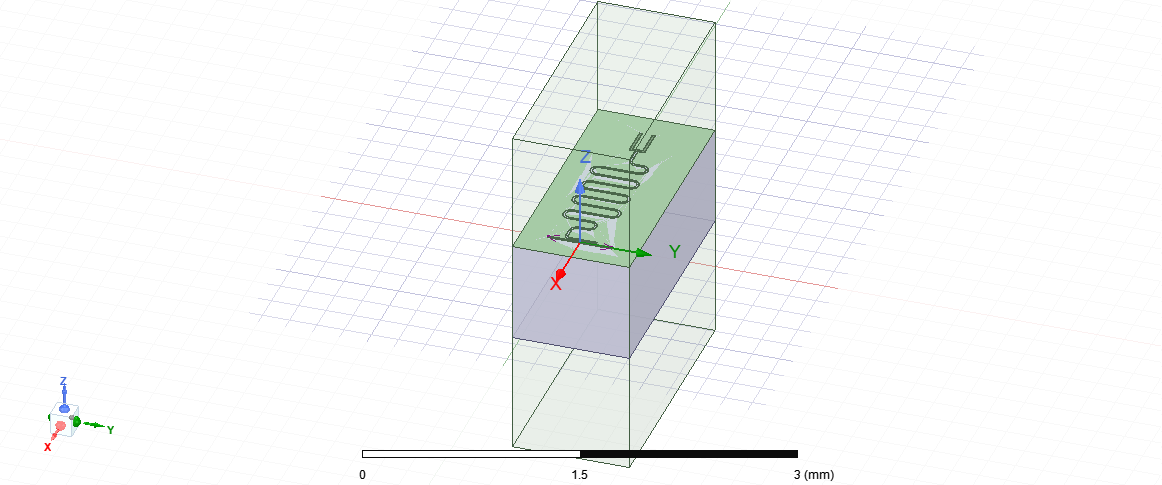

Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
freq = 6.308 GHz
Q = 59260.3
kappa = 0.106 MHz
the parameters ['run'] are unsupported, so they have been ignored
{'pos_x': '-1500um', 'pos_y': '1200um', 'orientation': '-90', 'chip': 'main', 'layer': '1', 'connection_pads': {'readout': {'connector_type': '0', 'claw_length': '210um', 'ground_spacing': '10um', 'claw_width': '15um', 'claw_gap': '5.1um', 'claw_cpw_length': '40um', 'claw_cpw_width': '10um', 'connector_location': '90'}}, 'cross_width': '30um', 'cross_length': '230um', 'cross_gap': '30um', 'hfss_inductance': 9.686e-09, 'hfss_capacitance': 0, 'hfss_resistance': 0, 'hfss_mesh_kw_jj': 7e-06, 'q3d_inductance': '10nH', 'q3d_capacitance': 0, 'q3d_resistance': 0, 'q3d_mesh_kw_jj': 7e-06, 'gds_cell_name': 'my_other_junction', 'aedt_q3d_inductance': 1e-08, 'aedt_q3d_capacitance': 0, 'aedt_hfss_inductance': 9.686e-09, 'aedt_hfss_capacitance': 0}


INFO 02:56PM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d4 [Solution type: Q3D]
WARNING 02:56PM [connect_setup]: 	No design setup detected.
WARNING 02:56PM [connect_setup]: 	Creating Q3D default setup.
INFO 02:56PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:56PM [get_setup]: 	Opened setup `sweep_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:56PM [analyze]: Analyzing setup sweep_setup
INFO 02:58PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpmivwt99w.txt, C, , sweep_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 02:58PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp4ct4xdg5.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 02:58PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp4m2ohwty.txt, C, , sweep_setup:AdaptivePass, "Original"

{'sim_options': {'setup': {'eigenmode_setup': {'basis_order': 1,
    'max_delta_f': 0.05,
    'max_passes': 50,
    'min_converged': 1,
    'min_converged_passes': 2,
    'min_freq_ghz': 1,
    'min_passes': 1,
    'n_modes': 1,
    'name': 'Setup',
    'pct_refinement': 30,
    'reuse_selected_design': True,
    'reuse_setup': True,
    'vars': {'Cj': '0fF', 'Lj': '0nH'}},
   'LOM_setup': {'auto_increase_solution_order': True,
    'enabled': True,
    'freq_ghz': 5.0,
    'max_passes': 30,
    'min_converged_passes': 1,
    'min_passes': 2,
    'name': 'sweep_setup',
    'percent_error': 0.1,
    'percent_refinement': 30,
    'reuse_selected_design': False,
    'reuse_setup': False,
    'run': {'box_plus_buffer': True,
     'components': array(['Q'], dtype=object),
     'name': 'sweep_v2.0',
     'open_terminations': array([array(['Q', 'readout'], dtype=object)], dtype=object)},
    'save_fields': False,
    'solution_order': 'High',
    'solver_type': 'Iterative'}},
  'simulator': 'A

In [13]:
ansys_results = ansys_simulator.simulate(best_device)
ansys_results

To extract the simulated Hamiltonian parameters, we look at the `sim_results` key in our `ansys_results` dictionary:

In [14]:
hamiltonian_results = ansys_results["sim_results"]
hamiltonian_results

{'cavity_frequency_GHz': 6308117345.860001,
 'Q': 59260.33517755982,
 'kappa_kHz': 106447.5475368,
 'g_MHz': 71.7658093094819,
 'anharmonicity_MHz': -179.09368607215725,
 'qubit_frequency_GHz': 4.451709052213033}

We can similarly get screenshots from Qiskit Metal and the Ansys renderer. Notice that the TransmonCross object and the cavity+claw object are rendered into the same design in Qiskit Metal. This is done purely out of convenience, and has no effect on the simulation results. This is shown in the renderer screenshots below, which show the TransmonCross and cavity+claw being rendered and simulated separately.

02:58PM 40s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



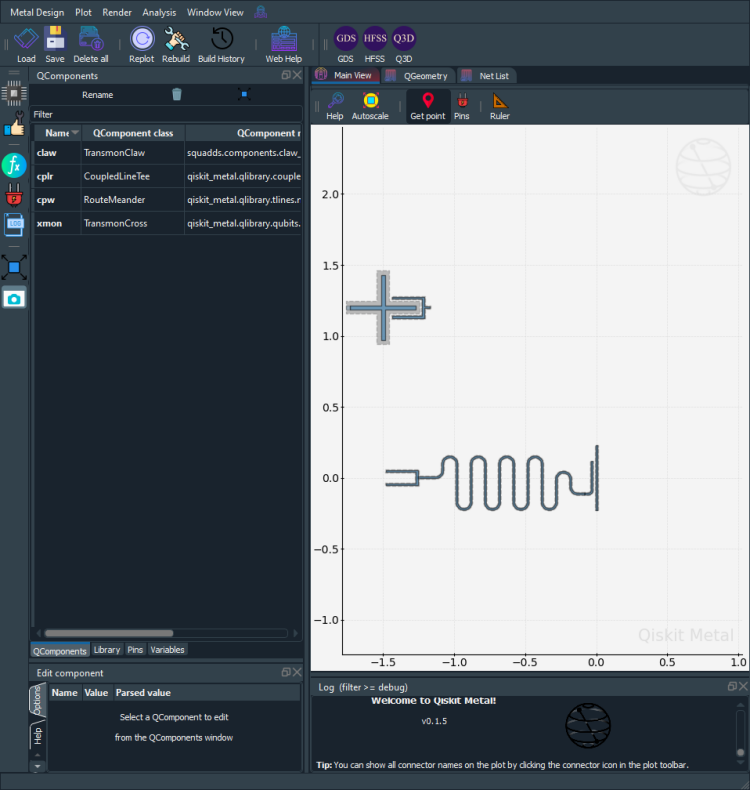

In [15]:
ansys_simulator.get_design_screenshot()

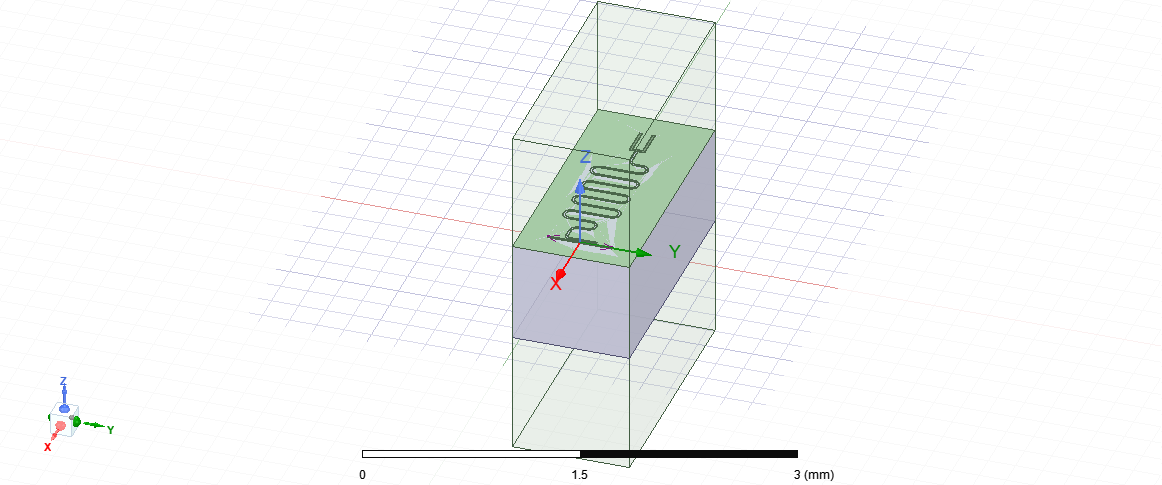

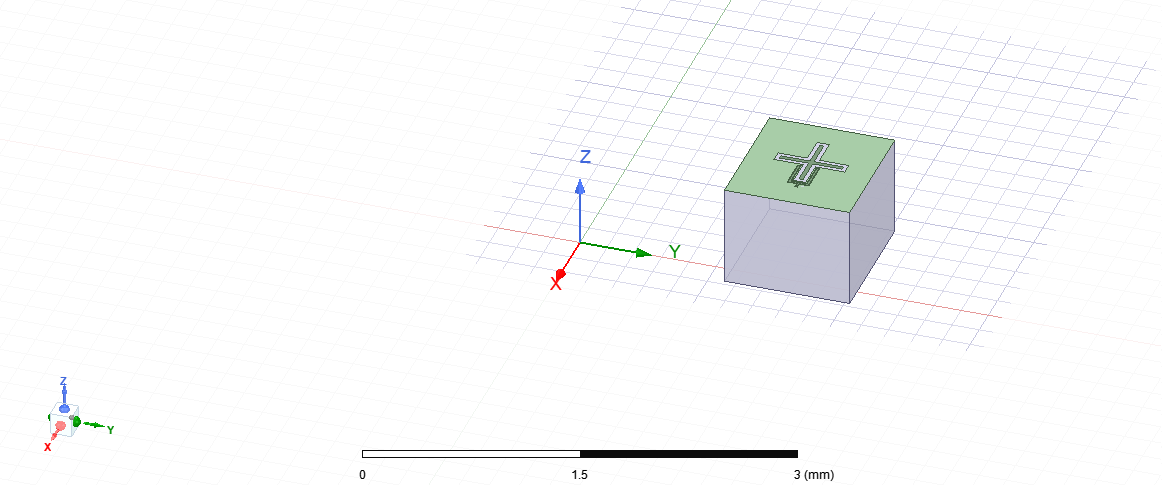

In [16]:
ansys_simulator.get_renderer_screenshot()

We can also plot our complete custom QubitCavity device in Qiskit Metal. 

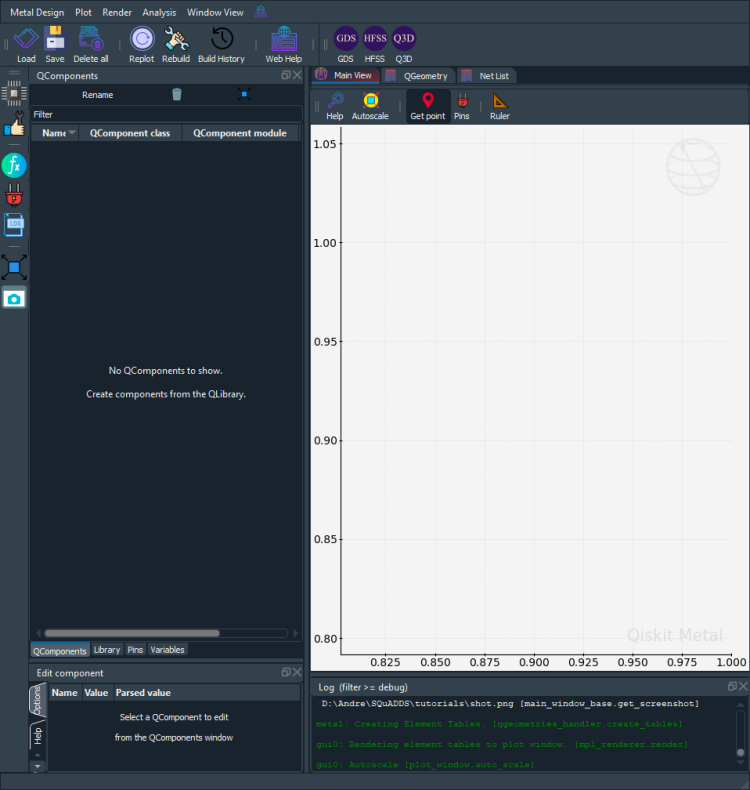

In [17]:
ansys_simulator.plot_device(ansys_results)

Finally, we can once again get relevant results dictionaries that will be useful if/when you decide to contribute your results to SQuADDS!

In [18]:
design_dict = ansys_results["design"]
design_dict

{'design_options': {'cavity_options': {'coupling_type': 'CLT',
   'coupler_options': {'coupling_length': '230um',
    'coupling_space': '7.9um',
    'down_length': '50um',
    'open_termination': False,
    'orientation': '-90',
    'prime_gap': '5.1um',
    'prime_width': '11.7um',
    'second_gap': '5.1um',
    'second_width': '11.7um'},
   'cpw_options': {'left_options': {'fillet': '49.9um',
     'lead': {'end_straight': '50um',
      'start_jogged_extension': {0: ['R90', '153.33333333333334um']},
      'start_straight': '100um'},
     'meander': {'asymmetry': '76.66666666666667um', 'spacing': '100um'},
     'pin_inputs': {'end_pin': {'component': 'claw', 'pin': 'readout'},
      'start_pin': {'component': 'cplr', 'pin': 'second_end'}},
     'total_length': '3900um',
     'trace_gap': '5.1um',
     'trace_width': '11.7um'}}},
  'qubit_options': {'aedt_hfss_capacitance': 0,
   'aedt_hfss_inductance': 9.686e-09,
   'aedt_q3d_capacitance': 0,
   'aedt_q3d_inductance': 1e-08,
   'chip':

In [19]:
sim_options_dict = ansys_results["sim_options"]
sim_options_dict

{'setup': {'eigenmode_setup': {'basis_order': 1,
   'max_delta_f': 0.05,
   'max_passes': 50,
   'min_converged': 1,
   'min_converged_passes': 2,
   'min_freq_ghz': 1,
   'min_passes': 1,
   'n_modes': 1,
   'name': 'Setup',
   'pct_refinement': 30,
   'reuse_selected_design': True,
   'reuse_setup': True,
   'vars': {'Cj': '0fF', 'Lj': '0nH'}},
  'LOM_setup': {'auto_increase_solution_order': True,
   'enabled': True,
   'freq_ghz': 5.0,
   'max_passes': 30,
   'min_converged_passes': 1,
   'min_passes': 2,
   'name': 'sweep_setup',
   'percent_error': 0.1,
   'percent_refinement': 30,
   'reuse_selected_design': False,
   'reuse_setup': False,
   'run': {'box_plus_buffer': True,
    'components': array(['Q'], dtype=object),
    'name': 'sweep_v2.0',
    'open_terminations': array([array(['Q', 'readout'], dtype=object)], dtype=object)},
   'save_fields': False,
   'solution_order': 'High',
   'solver_type': 'Iterative'}},
 'simulator': 'Ansys HFSS'}

In [20]:
sim_results_dict = ansys_results["sim_results"]
sim_results_dict

{'cavity_frequency_GHz': 6308117345.860001,
 'Q': 59260.33517755982,
 'kappa_kHz': 106447.5475368,
 'g_MHz': 71.7658093094819,
 'anharmonicity_MHz': -179.09368607215725,
 'qubit_frequency_GHz': 4.451709052213033}

We can once again update the units for our results. However, this time, the units are not all the same, so we must specify individual units by following the convention `f"{var_name}_unit"`

In [ ]:
sim_results_dict.update({
    "cavity_frequency_GHz_unit": "GHz",
    "Q_unit": "none",
    "g_MHz_unit": "MHz",
    "anharmonicity_MHz_unit": "MHz",
    "kappa_kHz_unit": "kHz",
    "qubit_frequency_GHz_unit": "GHz",
})
sim_results_dict

## License

<div style='width: 100%; background-color:#3cb1c2;color:#324344;padding-left: 10px; padding-bottom: 10px; padding-right: 10px; padding-top: 5px'>
    <h3>This code is a part of SQuADDS</h3>
    <p>Developed by Sadman Ahmed Shanto</p>
    <p>&copy; Copyright Sadman Ahmed Shanto & Eli Levenson-Falk 2023.</p>
    <p>This code is licensed under the MIT License. You may<br> obtain a copy of this license in the LICENSE.txt file in the root directory<br> of this source tree.</p>
    <p>Any modifications or derivative works of this code must retain this<br>copyright notice, and modified files need to carry a notice indicating<br>that they have been altered from the originals.</p>
</div>